In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Modelling population size
Let $u$ be a function modeling a mobile population living in an environment with a growth rate of $r$\% per year with a carrying capacity of $K$. The typical equation that governs the size of the population is,

$$
    \frac{du}{dt} = ru \left(1 - \frac{u}{K}\right)
$$

Now assume that hunters harvest $h$\% of the population per year. This can be accounted for in the above equation by adding an additional hunting term.

$$
    \frac{du}{dt} = ru \left(1 - \frac{u}{K}\right) - hu
$$

The second equation is a first-order nonlinear ordinary differential equation. The parameter space for $u$ can defined from $u\in [0, \infty)$, where the carrying capacity, $K \in \mathbb{R}^+$. We will see that after solving the differential equation the $u$ actually only goes from $0$ to $K$. Both $r, u \in [0,1]$, as they represent the fraction of population growing/getting hunted. Since this is an initial value problem, we need to provide some population size at time $t=0$. Assuming we need at least 2 organisms to reproduce, we provide $u(0)=2$. However the solution will not be much different with any other small value of $u(0)$.

### Setting up the simulation

Euler's explicit method

In [9]:
def euler(f,u0,t, dt, r, h, K):
    u = np.zeros(len(t))
    u[0] = u0
    for i in range(0,len(t)-1):
        u[i+1] = u[i] + f(u[i],t[i], r, h, K)*dt
    return u

Runge Kutta 2 Method

In [10]:
def rk2(f,u0,t, dt, r, h, K):
    u = np.zeros(len(t))
    u[0] = u0
    for i in range(0,len(t)-1):
        K1 = dt*f(u[i],t[i], r, h, K)
        K2 = dt*f((u[i]+K1/2),(t[i]+dt/2), r, h, K)
        u[i+1] = u[i] + 1/2*(K1 + K2)
    return u

Runge Kutta 4 Method

In [11]:
def rk4(f,u0,t, dt, r, h, K):
    u = np.zeros(len(t))
    u[0] = u0
    for i in range(0,len(t)-1):
        K1 = dt*f(u[i],t[i], r, h, K)
        K2 = dt*f((u[i]+K1/2),(t[i]+dt/2), r, h, K)
        K3 = dt*f((u[i]+K2/2),(t[i]+dt/2), r, h, K)
        K4 = dt*f((u[i]+K3),(t[i]+dt), r, h, K)
        u[i+1] = u[i] + 1/6*(K1 + 2*K2 + 2*K3 + K4)
    return u

### Define $\frac{du}{dt}$

In [12]:
def dudt(u, t, r, h, K):
    return r*u*(1-(u/K)) - (h*u)

### Comparing different methods

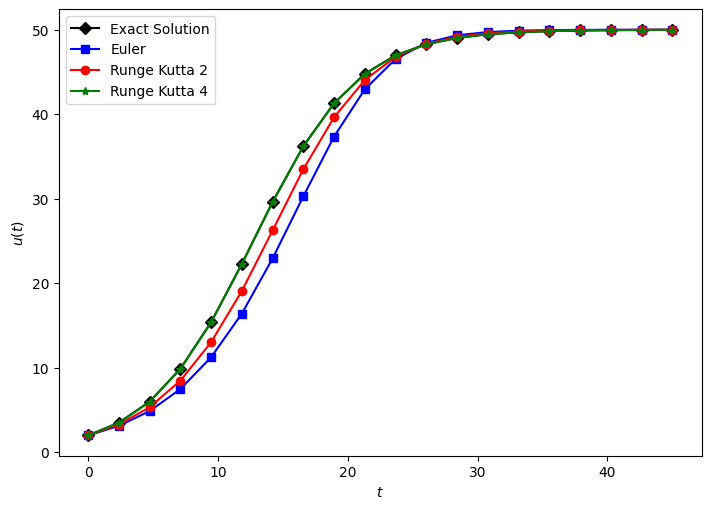

In [13]:
# Initial Conditions
u0 = 2
r = 0.5
K = 100
h = 0.25

# setting up the time array
t0 = 0
tf = 45
points = 20
t = np.linspace(t0, tf, points)
dt = t[2]-t[1]

u_Euler = euler(dudt,u0, t, dt, r, h, K)
u_RK4 = rk4(dudt,u0,t, dt, r, h, K)
u_RK2 = rk2(dudt,u0,t, dt, r, h, K)
u_exact = (50*np.exp(0.25*t))/(24.+np.exp(0.25*t))

# plotting 
plt.figure(num=1, figsize=(7, 5))
plt.plot(t,u_exact,'Dk-', label = "Exact Solution")
plt.plot(t,u_Euler,'sb-', label = "Euler")
plt.plot(t,u_RK2,'or-', label = "Runge Kutta 2")
plt.plot(t,u_RK4,'*g-', label = "Runge Kutta 4")
plt.legend()
# plt.grid(True, color='lightgray')
plt.tight_layout()
plt.xlabel("$t$")
plt.ylabel("$u(t)$")
plt.savefig('plots/5a/comparison.png', dpi=200)

### Solutions

#### Variation of hunting rate, $h$

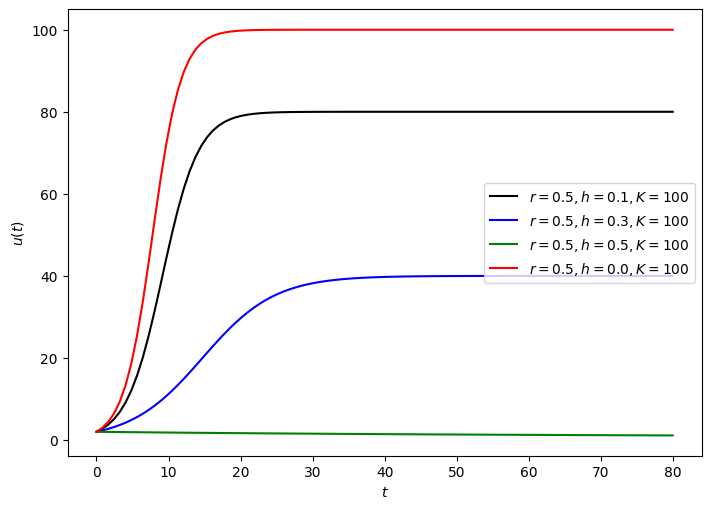

In [14]:
plt.figure(figsize=(7, 5))

t0 = 0
tf = 80
points = 100
t = np.linspace(t0, tf, points)
dt = t[2]-t[1]

u0=2
plt.plot(t, rk4(dudt,u0,t, dt, r=0.5, h=0.1, K=100),
         'k-', label = "$r=0.5, h=0.1, K=100$")
plt.plot(t, rk4(dudt,u0,t, dt, r=0.5, h=0.3, K=100),
         'b-', label = "$r=0.5, h=0.3, K=100$")
plt.plot(t, rk4(dudt,u0,t, dt, r=0.5, h=0.5, K=100),
         'g-', label = "$r=0.5, h=0.5, K=100$")
plt.plot(t, rk4(dudt,u0,t, dt, r=0.5, h=0.0, K=100),
         'r-', label = "$r=0.5, h=0.0, K=100$")

# plotting 
plt.legend(loc='right')
plt.tight_layout()
plt.xlabel("$t$")
plt.ylabel("$u(t)$")
plt.savefig('plots/5a/varyH.png', dpi=200)

#### Variation of growth rate, $r$

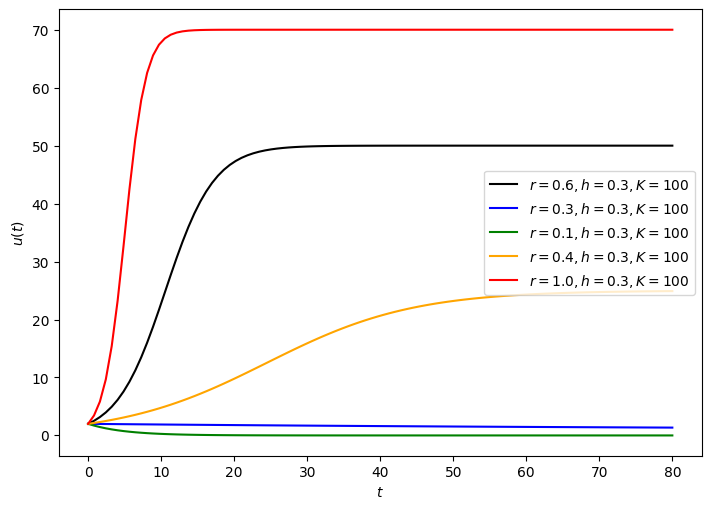

In [15]:
plt.figure(figsize=(7, 5))

t0 = 0
tf = 80
points = 100
t = np.linspace(t0, tf, points)
dt = t[2]-t[1]

u0=2
plt.plot(t, rk4(dudt,u0,t, dt, r=0.6, h=0.3, K=100),
         'k-', label = "$r=0.6, h=0.3, K=100$")
plt.plot(t, rk4(dudt,u0,t, dt, r=0.3, h=0.3, K=100),
         'b-', label = "$r=0.3, h=0.3, K=100$")
plt.plot(t, rk4(dudt,u0,t, dt, r=0.1, h=0.3, K=100),
         'g-', label = "$r=0.1, h=0.3, K=100$")
plt.plot(t, rk4(dudt,u0,t, dt, r=0.4, h=0.3, K=100),
         'orange', label = "$r=0.4, h=0.3, K=100$")
plt.plot(t, rk4(dudt,u0,t, dt, r=1.0, h=0.3, K=100),
         'r-', label = "$r=1.0, h=0.3, K=100$")

# plotting 
plt.legend(loc='right')
plt.tight_layout()
plt.xlabel("$t$")
plt.ylabel("$u(t)$")
plt.savefig('plots/5a/varyR.png', dpi=200)

#### Variation of carrying capacity, $K$

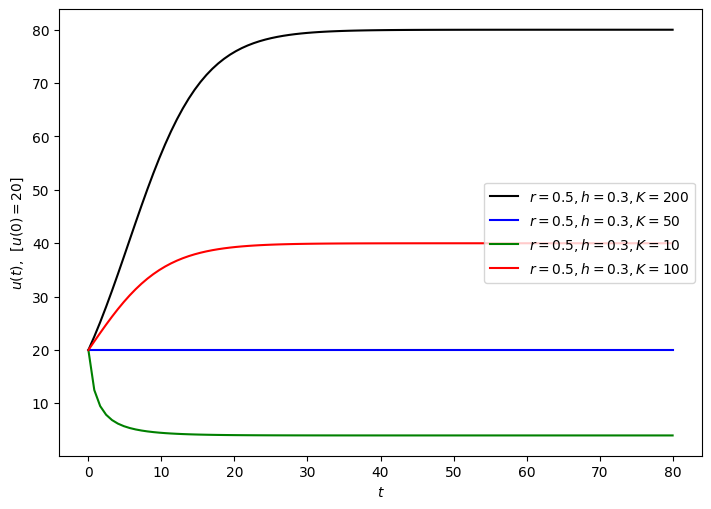

In [16]:
plt.figure(figsize=(7, 5))

t0 = 0
tf = 80
points = 100
t = np.linspace(t0, tf, points)
dt = t[2]-t[1]

u0=20
plt.plot(t, rk4(dudt,u0,t, dt, r=0.5, h=0.3, K=200),
         'k-', label = "$r=0.5, h=0.3, K=200$")
plt.plot(t, rk4(dudt,u0,t, dt, r=0.5, h=0.3, K=50),
         'b-', label = "$r=0.5, h=0.3, K=50$")
plt.plot(t, rk4(dudt,u0,t, dt, r=0.5, h=0.3, K=10),
         'g-', label = "$r=0.5, h=0.3, K=10$")
plt.plot(t, rk4(dudt,u0,t, dt, r=0.5, h=0.3, K=100),
         'r-', label = "$r=0.5, h=0.3, K=100$")

# plotting 
plt.legend(loc='right')
plt.tight_layout()
plt.xlabel("$t$")
plt.ylabel("$u(t),\,\,\,[u(0)=20]$")
plt.savefig('plots/5a/varyK.png', dpi=200)